# Partie prédictive:
## Vous mettrez en place un modèle de regression linéaire qui permet d'estimer le temps de trajet en fonction de sa distance.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import Image

#df = pd.read_csv("../data/02_intermediate/train.csv")
df = pd.read_csv("../data/02_intermediate/dirty_train.csv")

In [61]:
folder = 'plots/'
files = os.listdir(folder)


def make_plot(x, y, name, override=False):
    """
        Save the pairplots as an image without rendering it ,
        then it display the image.

        params:
            x(series): x axis datas,
            y(series): y axis datas,
            name(string): name of the file for saving or displaying,
            override(bool): if True, override saved file
    """
    filename = "plot_{}.jpg".format(name)
    path = "./{}{}".format(folder, filename)

    if override or filename not in files:
        print("Saving...")
        plt.figure(figsize=(12,6))
        sns.regplot(x=x,y=y)
        plt.savefig(path)
        print("Saved as {} in folder {}".format(filename, path))
        plt.clf()
    else:
        print("File already exist")
    display(Image(filename=path))



### Régression linéaire à un paramètre

In [62]:

y = df.trip_duration
df_features = ["distance"]
X = df[df_features]

split = train_test_split(
        X, y, train_size=0.8, random_state=None
    )

X_train, X_test, y_train, y_test = split
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [63]:
df.describe()
print(df.trip_duration.describe())

count    1.456605e+06
mean     8.409125e+02
std      7.824836e+02
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.073000e+03
max      6.973200e+04
Name: trip_duration, dtype: float64


File already exist


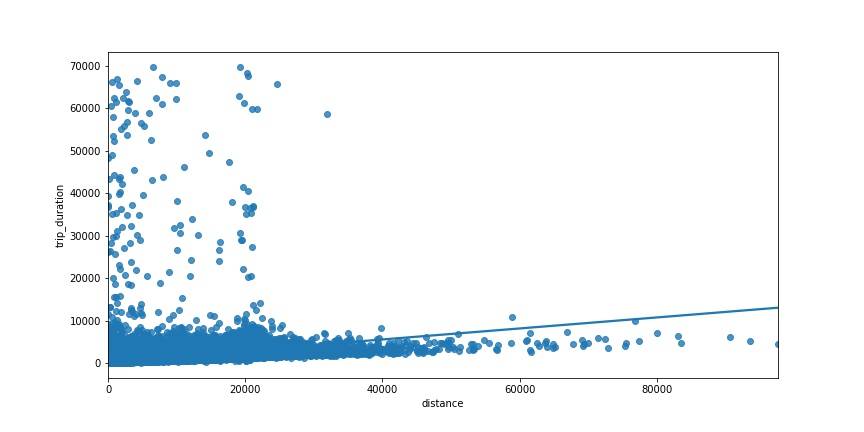

In [64]:
make_plot(X_train, y_train, "regression_lineaire_dirty", override=False)

### Modèle multi linéaire

In [65]:
def get_model_metrics(model, split):
    X_train, X_test, y_train, y_test = split
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"Coéfficents de corrélations : {model.coef_}\n")
    print ("Train R2 : {}, Train RMSE : {}".format(
            round(r2_score(y_train, y_train_pred),3),
            round(mean_squared_error(y_train, y_train_pred, squared=False),3)
    ))

    print ("Test R2  : {}, Test RMSE  : {}".format(
            round(r2_score(y_test, y_test_pred),3), 
            round(mean_squared_error(y_test, y_test_pred, squared=False),3)))

### Modèle 1

In [66]:
y = df.trip_duration
df_features = [
    "distance",
    "pickup_dayofweek",
    "pickup_part4h"
]
X = df[df_features]

### Choix des features :
- *distance* : indicateur pincipale pour calculer la durée du trajet
- *pickup_dayofweek* : on suppose que le jour à une influence sur l'état du trafic et donc sur la durée du trajet
- *pickup_part4h* :on suppose que le moment de la journée à une influence sur l'état du trafic et donc sur la durée du trajet

### Hypothèse : absence de colinéarité entre les variables explicatives

In [67]:
df_cut = df[[
    "trip_duration",
    "distance",
    "pickup_dayofweek",
    "pickup_part4h"
]].corr()
df_cut


,trip_duration,distance,pickup_dayofweek,pickup_part4h
trip_duration,1.000000,0.652292,-0.028660,0.023290
distance,0.652292,1.000000,0.008372,-0.017980
pickup_dayofweek,-0.028660,0.008372,1.000000,-0.083753
pickup_part4h,0.023290,-0.017980,-0.083753,1.000000


Les coefficients de corrélation sont inférieur à 0.8.
La distance est la variable la plus corrélé, tandis que que les deux autres variables ont un impacts assez faible

## Évaluation du modèle

### LinearRegression()

In [68]:
get_model_metrics(LinearRegression(), split)


Coéfficents de corrélations : [0.12917549]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.033


### Lasso() avec différents alpha

In [69]:
alphas = [1000, 5000, 100000, 200000, 500000, 1000000]

In [70]:
for a in alphas:
    print(f"Avec Alpha = {a}")
    get_model_metrics(Lasso(alpha=a), split)
    print("\n")


Avec Alpha = 1000
Coéfficents de corrélations : [0.12911105]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.036


Avec Alpha = 5000
Coéfficents de corrélations : [0.12885327]

Train R2 : 0.426, Train RMSE : 591.099
Test R2  : 0.425, Test RMSE  : 601.047


Avec Alpha = 100000
Coéfficents de corrélations : [0.12273114]

Train R2 : 0.425, Train RMSE : 591.643
Test R2  : 0.423, Test RMSE  : 601.818


Avec Alpha = 200000
Coéfficents de corrélations : [0.11628679]

Train R2 : 0.421, Train RMSE : 593.274
Test R2  : 0.42, Test RMSE  : 603.678


Avec Alpha = 500000
Coéfficents de corrélations : [0.09695374]

Train R2 : 0.399, Train RMSE : 604.572
Test R2  : 0.397, Test RMSE  : 615.588


Avec Alpha = 1000000
Coéfficents de corrélations : [0.06473199]

Train R2 : 0.32, Train RMSE : 643.304
Test R2  : 0.317, Test RMSE  : 655.081




 # Modèle 2

In [71]:
y = df.trip_duration
df_features = [
    "distance",
    "pickup_dayofweek"
]
X = df[df_features]

## Évaluation du modèle

In [72]:
get_model_metrics(LinearRegression(), split)

Coéfficents de corrélations : [0.12917549]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.033


# Modèle 3

In [73]:
y = df.trip_duration
df_features = [
    "distance",
    "pickup_part4h"
]
X = df[df_features]

## Évaluation du modèle

In [74]:
get_model_metrics(LinearRegression(), split)

Coéfficents de corrélations : [0.12917549]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.033


# Modèle 4

In [75]:
y = df.trip_duration
df_features = [
    "distance",
    "vendor_id"
]
X = df[df_features]

## Évaluation du modèle

In [76]:
get_model_metrics(LinearRegression(), split)

Coéfficents de corrélations : [0.12917549]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.033


# Modèle 5

In [77]:
y = df.trip_duration
df_features = [
    "pickup_dayofweek",
    "pickup_part4h"
]
X = df[df_features]

## Évaluation du modèle

In [78]:
get_model_metrics(LinearRegression(), split)

Coéfficents de corrélations : [0.12917549]

Train R2 : 0.426, Train RMSE : 591.098
Test R2  : 0.425, Test RMSE  : 601.033
